In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

df = pd.read_csv(r"C:\Users\Ditshego.Ramokolo\OneDrive - Komatsu Ltd\Documents\School Stuff\ITRPA4-34\Research Data\All Research Data.csv")

print(df)

                             Date       Description  Total_Active_Power_AVG  \
0         2019-01-01 00:00:00,000   PM_INV_B_Cabin2                0.000000   
1         2019-01-01 00:10:00,000   PM_INV_B_Cabin2                0.000000   
2         2019-01-01 00:20:00,000   PM_INV_B_Cabin2                0.000000   
3         2019-01-01 00:30:00,000   PM_INV_B_Cabin2                0.000000   
4         2019-01-01 00:40:00,000   PM_INV_B_Cabin2                0.000000   
...                           ...               ...                     ...   
52127564  2022-12-31 18:20:00,000  PM_INV_B_Cabin15               45.102833   
52127565  2022-12-31 18:30:00,000  PM_INV_B_Cabin15               33.722943   
52127566  2022-12-31 18:40:00,000  PM_INV_B_Cabin15               19.155838   
52127567  2022-12-31 18:50:00,000  PM_INV_B_Cabin15               10.199950   
52127568  2022-12-31 19:00:00,000  PM_INV_B_Cabin15                1.854100   

            Cabin  Inverter  Inverters  Hours    Fe

In [2]:
df.head()

,Date,Description,Total_Active_Power_AVG,Cabin,Inverter,Inverters,Hours,Feeder,Event
0,"2019-01-01 00:00:00,000",PM_INV_B_Cabin2,0.0,Cabin2,2,2.2,0,Feeder A,Sunrise Mode
1,"2019-01-01 00:10:00,000",PM_INV_B_Cabin2,0.0,Cabin2,2,2.2,0,Feeder A,Sunrise Mode
2,"2019-01-01 00:20:00,000",PM_INV_B_Cabin2,0.0,Cabin2,2,2.2,0,Feeder A,Sunrise Mode
3,"2019-01-01 00:30:00,000",PM_INV_B_Cabin2,0.0,Cabin2,2,2.2,0,Feeder A,Sunrise Mode
4,"2019-01-01 00:40:00,000",PM_INV_B_Cabin2,0.0,Cabin2,2,2.2,0,Feeder A,Sunrise Mode


In [3]:
df.tail()

,Date,Description,Total_Active_Power_AVG,Cabin,Inverter,Inverters,Hours,Feeder,Event
52127564,"2022-12-31 18:20:00,000",PM_INV_B_Cabin15,45.102833,Cabin15,2,15.2,18,Feeder B,Production Mode
52127565,"2022-12-31 18:30:00,000",PM_INV_B_Cabin15,33.722943,Cabin15,2,15.2,18,Feeder B,Production Mode
52127566,"2022-12-31 18:40:00,000",PM_INV_B_Cabin15,19.155838,Cabin15,2,15.2,18,Feeder B,Production Mode
52127567,"2022-12-31 18:50:00,000",PM_INV_B_Cabin15,10.199950,Cabin15,2,15.2,18,Feeder B,Production Mode
52127568,"2022-12-31 19:00:00,000",PM_INV_B_Cabin15,1.854100,Cabin15,2,15.2,19,Feeder B,Production Mode


In [4]:
df.columns

Index(['Date', 'Description', 'Total_Active_Power_AVG', 'Cabin', 'Inverter',
       'Inverters', 'Hours', 'Feeder', 'Event'],
      dtype='object')

In [5]:
df.describe()

,Total_Active_Power_AVG,Inverter,Inverters,Hours
count,5.212757e+07,52127569.0,5.212757e+07,5.212757e+07
mean,1.676860e+02,1.5,2.466089e+01,1.150536e+01
std,2.427349e+02,0.5,1.385255e+01,6.925346e+00
min,-9.261416e+00,1.0,1.100000e+00,0.000000e+00
25%,0.000000e+00,1.0,1.310000e+01,6.000000e+00
50%,1.111674e+00,2.0,2.510000e+01,1.200000e+01
75%,3.312547e+02,2.0,3.710000e+01,1.800000e+01
max,2.402820e+03,2.0,4.820000e+01,2.300000e+01


In [6]:
df.shape

(52127569, 9)

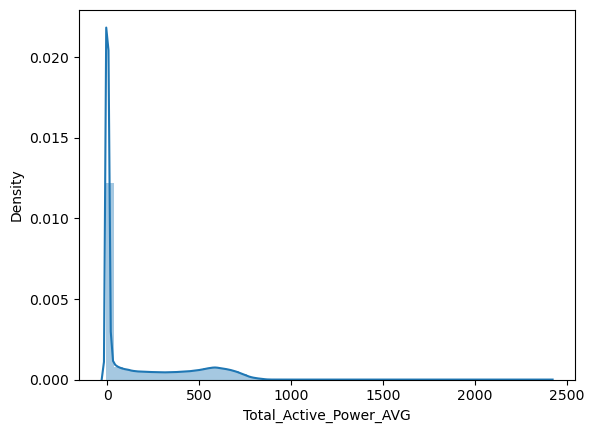

In [7]:
#histogram
sns.distplot(df['Total_Active_Power_AVG']);

In [8]:
#skewness and kurtosis
print("Skewness: %f" % df['Total_Active_Power_AVG'].skew())
print("Kurtosis: %f" % df['Total_Active_Power_AVG'].kurt())

Skewness: 1.146304
Kurtosis: -0.210958


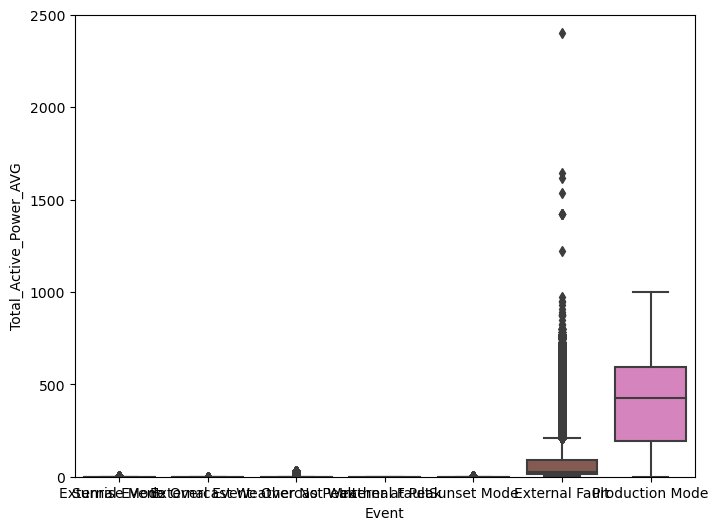

In [9]:
#box plot Event Management
var = 'Event'
data = pd.concat([df['Total_Active_Power_AVG'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Total_Active_Power_AVG", data=data)
fig.axis(ymin=0, ymax=2500);

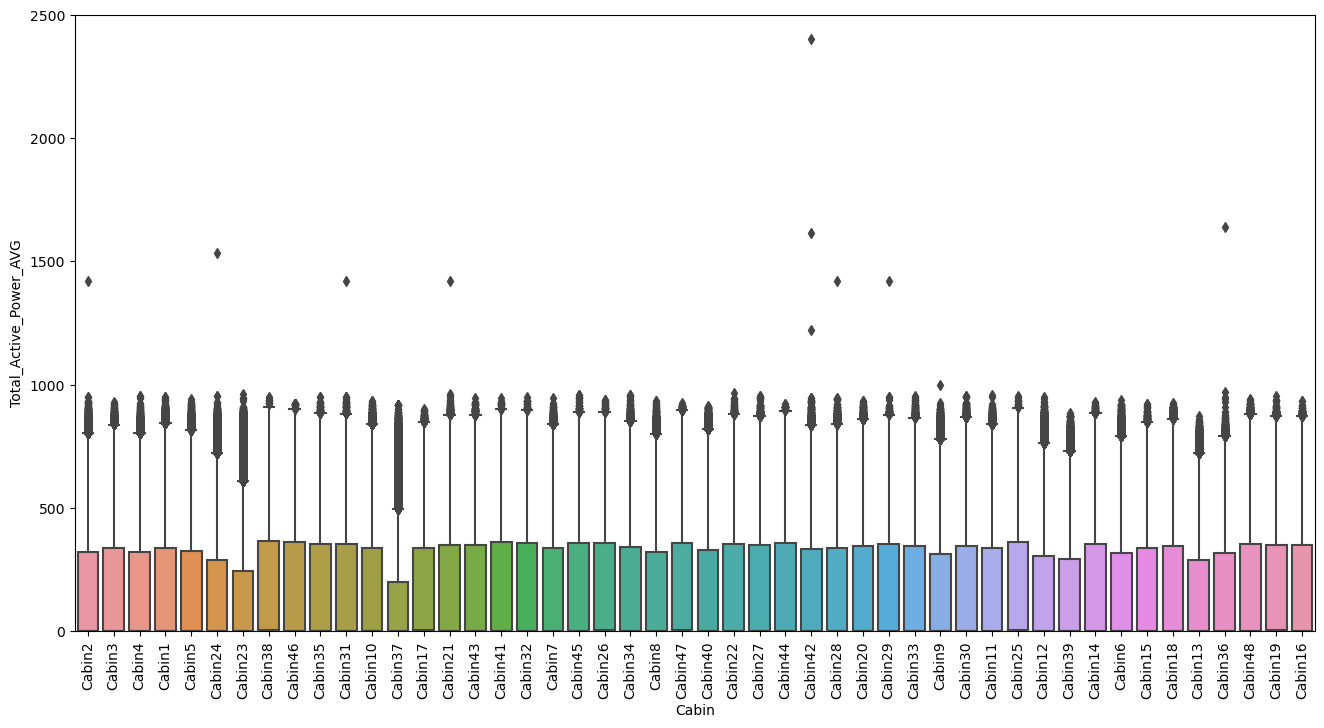

In [10]:
#box plot Cabins
var = 'Cabin'
data = pd.concat([df['Total_Active_Power_AVG'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="Total_Active_Power_AVG", data=data)
fig.axis(ymin=0, ymax=2500);
plt.xticks(rotation=90);

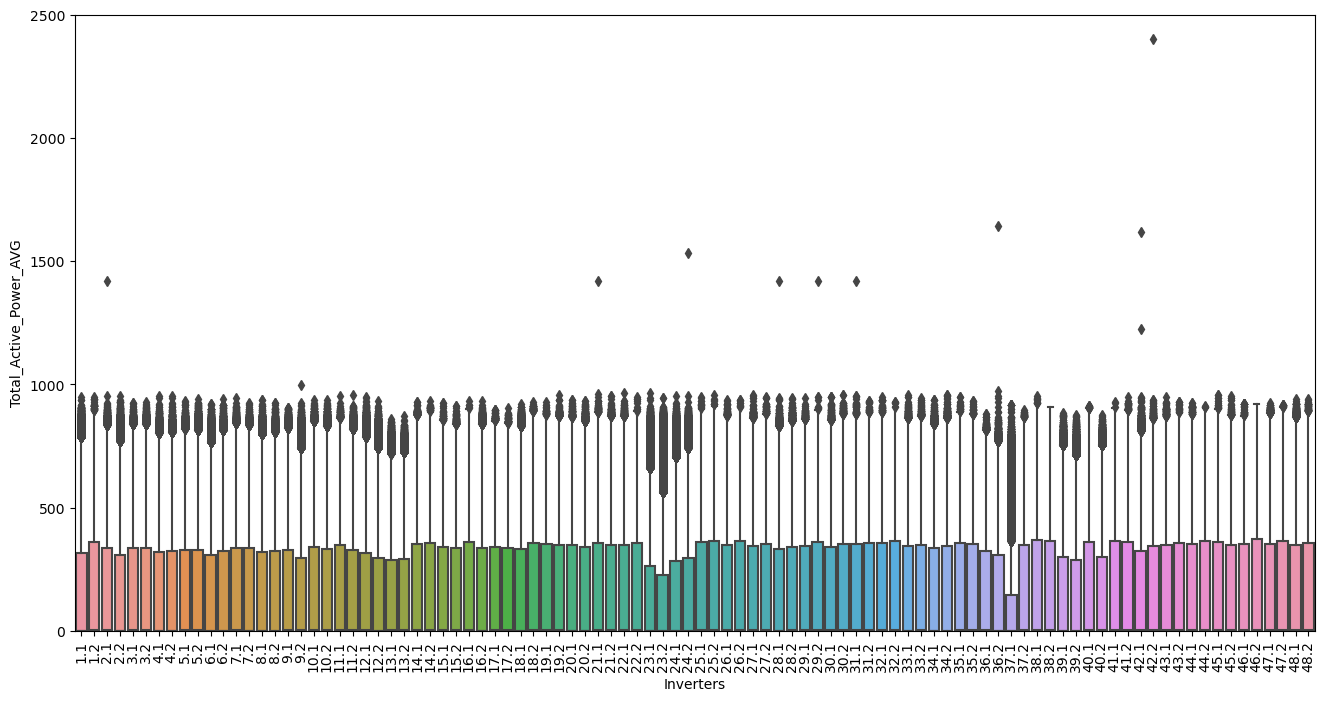

In [11]:
#box plot Inverters
var = 'Inverters'
data = pd.concat([df['Total_Active_Power_AVG'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="Total_Active_Power_AVG", data=data)
fig.axis(ymin=0, ymax=2500);
plt.xticks(rotation=90);

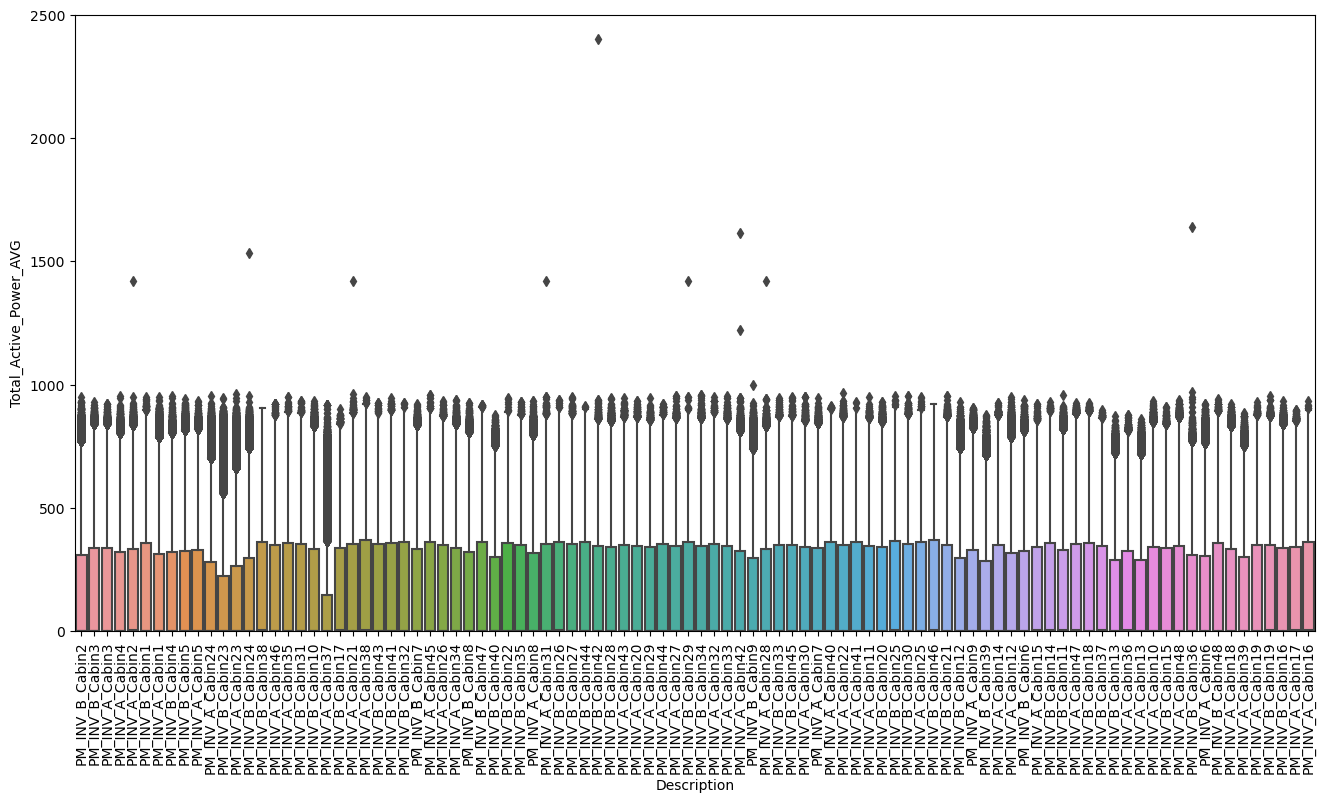

In [12]:
#box plot Description
var = 'Description'
data = pd.concat([df['Total_Active_Power_AVG'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="Total_Active_Power_AVG", data=data)
fig.axis(ymin=0, ymax=2500);
plt.xticks(rotation=90);

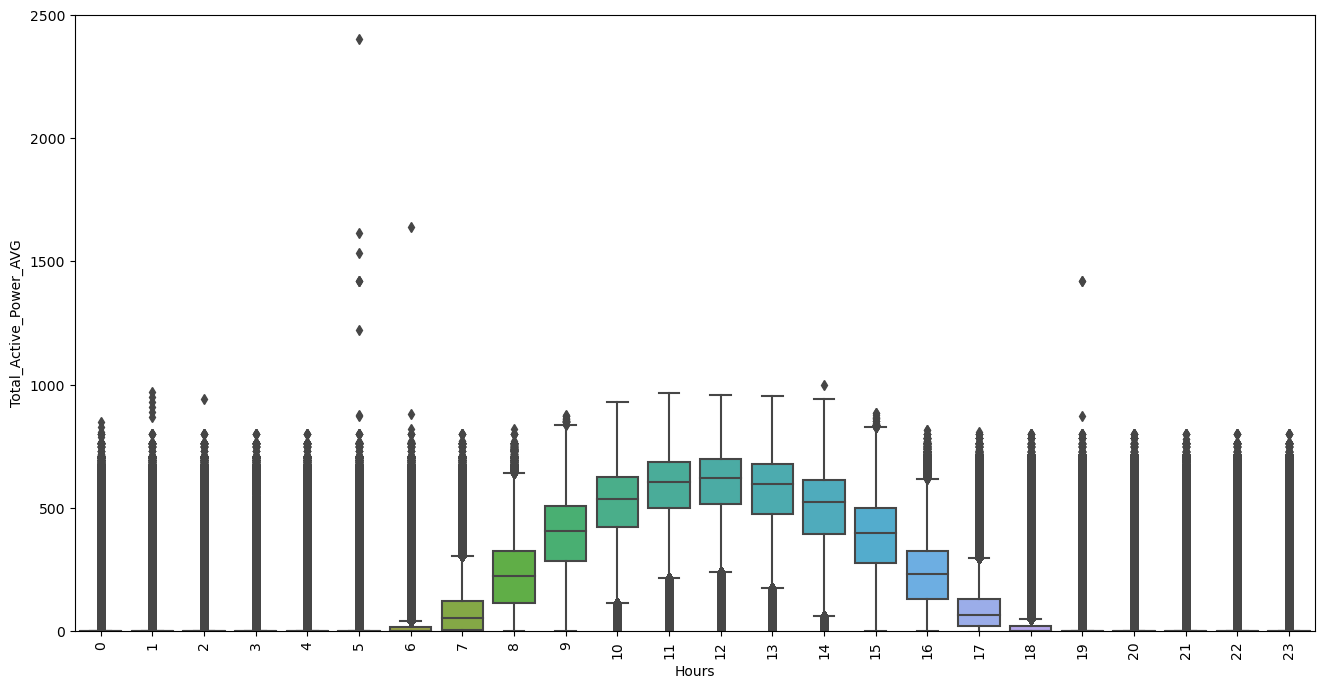

In [13]:
#box plot Hours
var = 'Hours'
data = pd.concat([df['Total_Active_Power_AVG'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="Total_Active_Power_AVG", data=data)
fig.axis(ymin=0, ymax=2500);
plt.xticks(rotation=90);

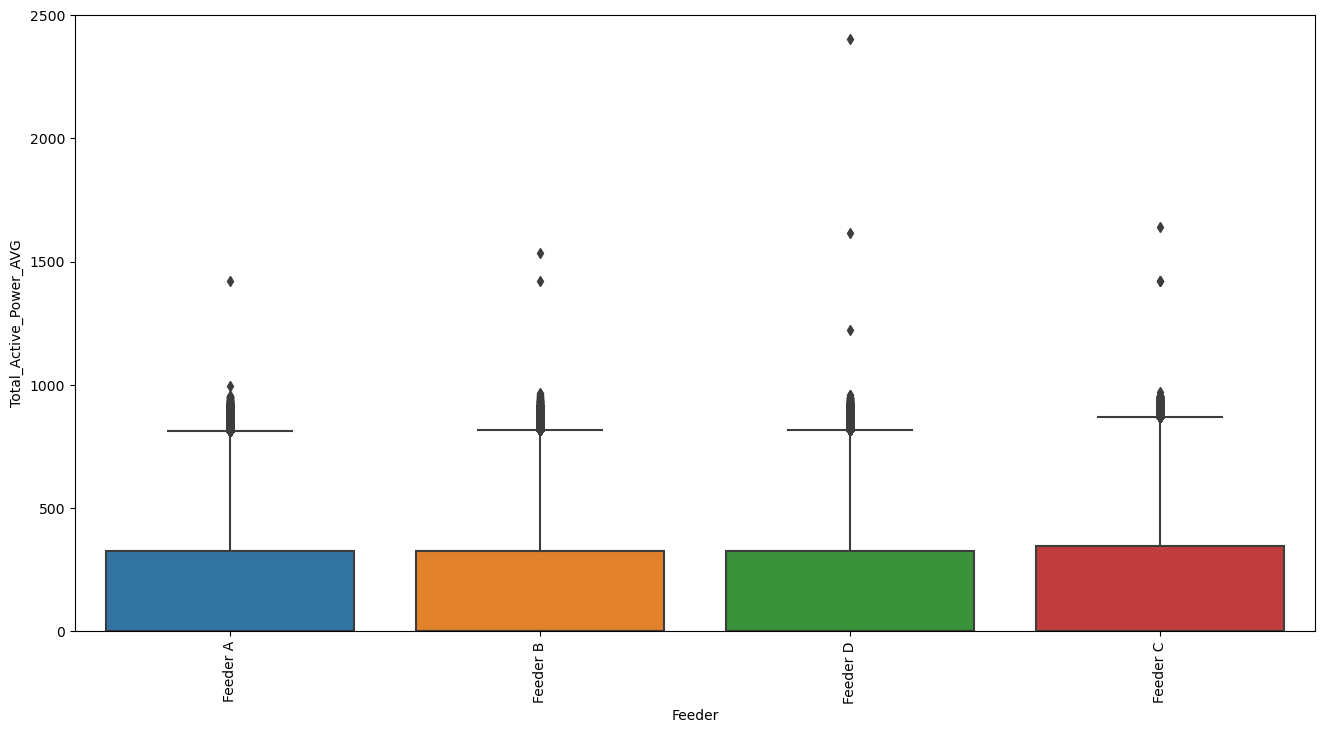

In [14]:
var = 'Feeder'
data = pd.concat([df['Total_Active_Power_AVG'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="Total_Active_Power_AVG", data=data)
fig.axis(ymin=0, ymax=2500);
plt.xticks(rotation=90);

<Axes: >

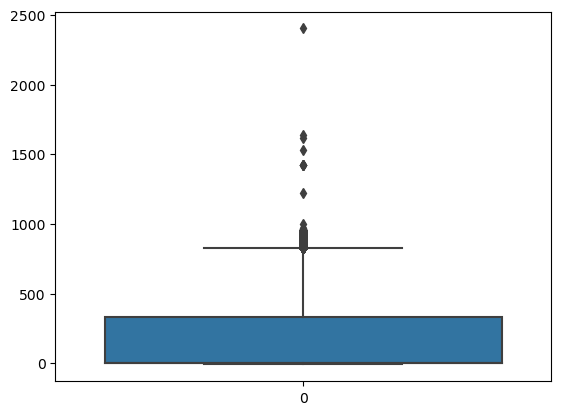

In [15]:
# Box Plot
import seaborn as sns
sns.boxplot(df['Total_Active_Power_AVG'])

In [16]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Date,0,0.0
Description,0,0.0
Total_Active_Power_AVG,0,0.0
Cabin,0,0.0
Inverter,0,0.0
Inverters,0,0.0
Hours,0,0.0
Feeder,0,0.0
Event,0,0.0


In [17]:
#dealing with missing data
df.isnull().sum().max() #just checking that there's no missing data missing...

0

In [18]:
# Using pandas.to_datetime()
df['Date'] = pd.to_datetime(df['Date'])

In [19]:
#standardizing data
Total_Active_Power_scaled = StandardScaler().fit_transform(df['Total_Active_Power_AVG'].to_numpy()[:,np.newaxis]);
low_range = Total_Active_Power_scaled[Total_Active_Power_scaled[:,0].argsort()][:10]
high_range= Total_Active_Power_scaled[Total_Active_Power_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-0.72897383]
 [-0.72457221]
 [-0.72435978]
 [-0.72430835]
 [-0.72413975]
 [-0.72325288]
 [-0.72293132]
 [-0.72261286]
 [-0.72259562]
 [-0.72253253]]

outer range (high) of the distribution:
[[4.34722602]
 [5.15750139]
 [5.15860775]
 [5.15981122]
 [5.15984238]
 [5.16023427]
 [5.62757591]
 [5.96875923]
 [6.0703389 ]
 [9.20812881]]


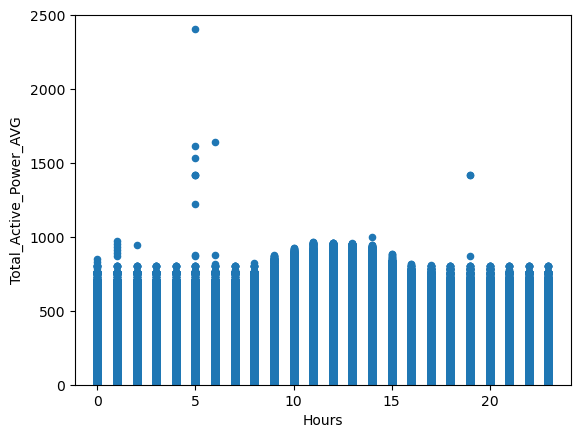

In [20]:
#bivariate analysis Active Power
var = 'Hours'
data = pd.concat([df['Total_Active_Power_AVG'], df[var]], axis=1)
data.plot.scatter(x=var, y='Total_Active_Power_AVG', ylim=(0,2500));

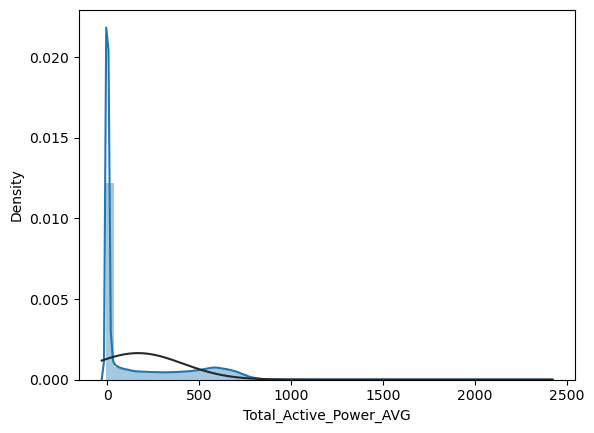

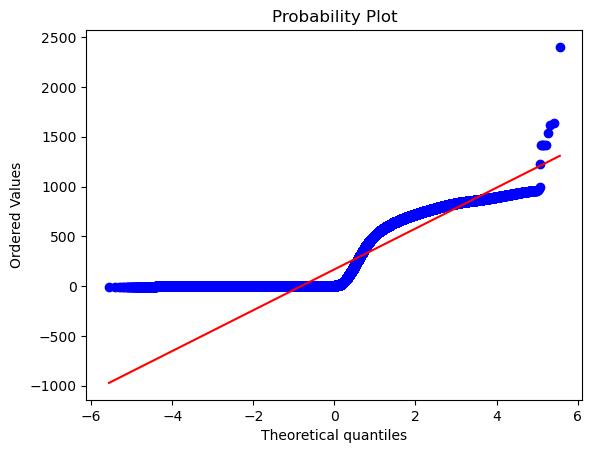

In [21]:
#histogram and normal probability plot
sns.distplot(df['Total_Active_Power_AVG'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['Total_Active_Power_AVG'], plot=plt)

In [22]:
#Removing some columns
df = df.drop(['Description', 'Cabin', 'Inverter', 'Feeder'], axis=1)

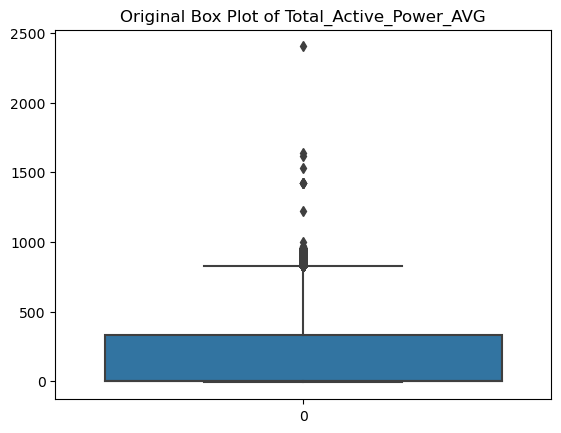

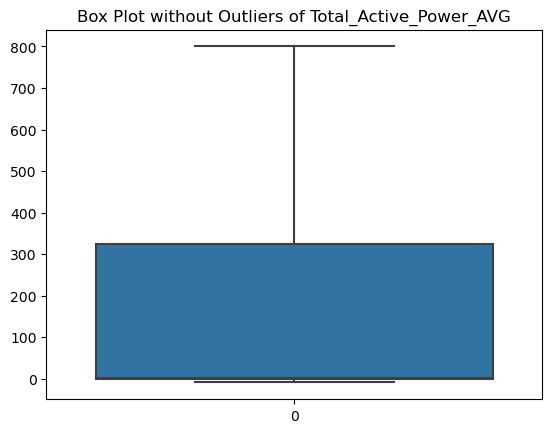

In [23]:
#Removing outliers
def removal_box_plot(df, column, threshold):
    sns.boxplot(df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()

    removed_outliers = df[df[column] <= threshold]

    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers


threshold_value = 800

no_outliers = removal_box_plot(df, 'Total_Active_Power_AVG', threshold_value)

In [24]:
df['Event'].replace({'Production Mode': 1}, inplace=True)
df['Event'].replace({'Internal Fault': 2}, inplace=True)
df['Event'].replace({'External Fault': 3}, inplace=True)
df['Event'].replace({'External Event: Overcast Weather No Peak': 4}, inplace=True)
df['Event'].replace({'Sunrise Mode': 5}, inplace=True)
df['Event'].replace({'Sunset Mode': 6}, inplace=True)
df['Event'].replace({'External Event: Overcast Weather at Peak': 7}, inplace=True)

In [25]:
dataset = df

dataset.head()

,Date,Total_Active_Power_AVG,Inverters,Hours,Event
0,2019-01-01 00:00:00,0.0,2.2,0,5
1,2019-01-01 00:10:00,0.0,2.2,0,5
2,2019-01-01 00:20:00,0.0,2.2,0,5
3,2019-01-01 00:30:00,0.0,2.2,0,5
4,2019-01-01 00:40:00,0.0,2.2,0,5


In [26]:
dataset.columns

Index(['Date', 'Total_Active_Power_AVG', 'Inverters', 'Hours', 'Event'], dtype='object')

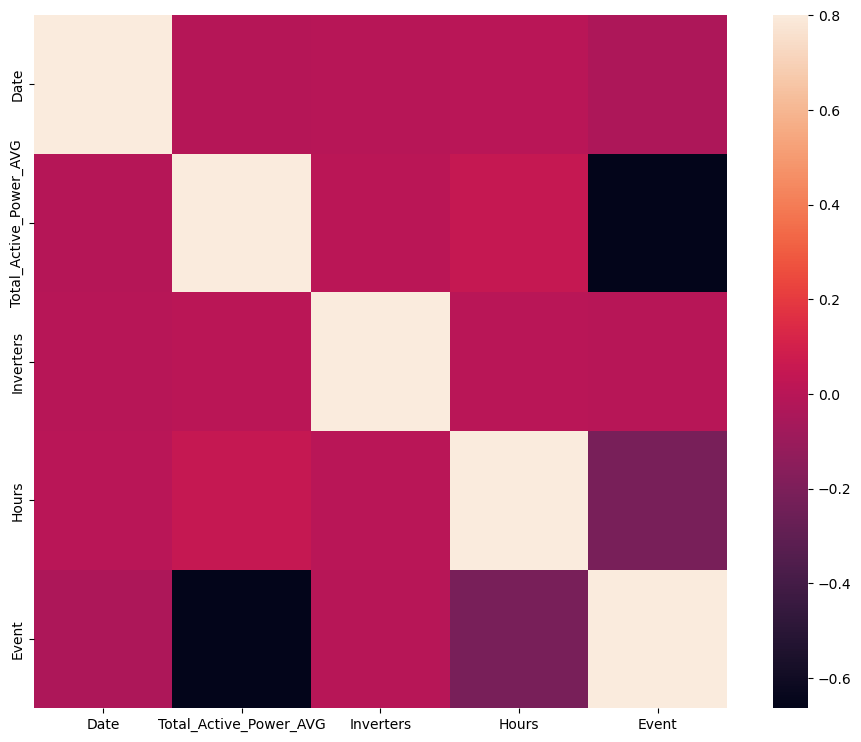

In [27]:
#correlation matrix
corrmat = dataset.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [28]:
dataset['Date'] = dataset['Date'].astype('datetime64[s]').astype(np.int64)

In [29]:
#Setting the value for X and Y
x = dataset[['Date', 'Total_Active_Power_AVG', 'Inverters', 'Hours']]
y = dataset['Event']

In [30]:
#Splitting the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 12)
print("Training and testing split was succesful")

Training and testing split was succesful


In [31]:
print("Training shapes:",X_train.shape, y_train.shape)
print("Test shapes:",X_test.shape, y_test.shape)

Training shapes: (41702055, 4) (41702055,)
Test shapes: (10425514, 4) (10425514,)


In [32]:
#Fitting the Decision Tree model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

#Evaluate the model
p_pred = model.predict_proba(X_train)
y_pred = model.predict(X_train)
score_ = model.score(X_train, y_train)
conf_m = confusion_matrix(y_train, y_pred)
report = classification_report(y_train, y_pred)

In [33]:
#Intercept and Coefficient
print('y_train:', y, sep='\n', end='\n\n')
print('p_pred:', p_pred, sep='\n', end='\n\n')
print('y_pred:', y_pred, end='\n\n')
print('score_:', score_, end='\n\n')
print('conf_m:', conf_m, sep='\n', end='\n\n')
print('report:', report, sep='\n')

y_train:
0           5
1           5
2           5
3           5
4           5
           ..
52127564    1
52127565    1
52127566    1
52127567    1
52127568    1
Name: Event, Length: 52127569, dtype: int64

p_pred:
[[0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]

y_pred: [3 1 1 ... 2 5 5]

score_: 1.0

conf_m:
[[17085023        0        0        0        0        0        0]
 [       0  4581504        0        0        0        0        0]
 [       0        0  3368481        0        0        0        0]
 [       0        0        0   359723        0        0        0]
 [       0        0        0        0 11042934        0        0]
 [       0        0        0        0        0  4673660        0]
 [       0        0        0        0        0        0   590730]]

report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00  1708502

In [34]:
# depth of the decision tree
print('Depth of the Decision Tree :', model.get_depth())

# predict the target on the train dataset
predict_train = model.predict(X_train)
print('Target on train data',predict_train) 

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = model.predict(X_test)
print('Target on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

Depth of the Decision Tree : 14
Target on train data [3 1 1 ... 2 5 5]
accuracy_score on train dataset :  1.0
Target on test data [1 3 2 ... 1 5 3]
accuracy_score on test dataset :  0.9999999040814679


[Text(0.595, 0.9666666666666667, 'x[1] <= 5.0\ngini = 0.731\nsamples = 41702055\nvalue = [17085023, 4581504, 3368481, 359723, 11042934, 4673660\n590730]'),
 Text(0.35, 0.9, 'x[3] <= 6.5\ngini = 0.645\nsamples = 21588734\nvalue = [405022, 4581504, 0, 359723, 11042930, 4673660, 525895]'),
 Text(0.3233333333333333, 0.8333333333333334, 'gini = 0.0\nsamples = 11042930\nvalue = [0, 0, 0, 0, 11042930, 0, 0]'),
 Text(0.37666666666666665, 0.8333333333333334, 'x[3] <= 20.5\ngini = 0.61\nsamples = 10545804\nvalue = [405022, 4581504, 0, 359723, 0, 4673660, 525895]'),
 Text(0.35, 0.7666666666666667, 'x[3] <= 11.5\ngini = 0.375\nsamples = 5872144\nvalue = [405022, 4581504, 0, 359723, 0, 0, 525895]'),
 Text(0.25333333333333335, 0.7, 'x[3] <= 7.5\ngini = 0.571\nsamples = 979362\nvalue = [98676, 0, 0, 356091, 0, 0, 524595]'),
 Text(0.22666666666666666, 0.6333333333333333, 'x[1] <= 0.0\ngini = 0.34\nsamples = 454767\nvalue = [98676, 0, 0, 356091, 0, 0, 0]'),
 Text(0.2, 0.5666666666666667, 'x[2] <= 15.15

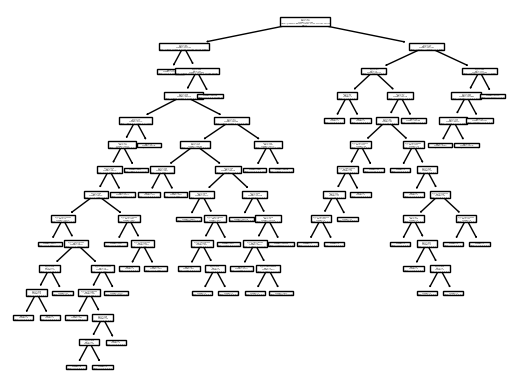

In [35]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


tree.plot_tree(model)

In [36]:
# Plot AUC/ROC curve
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model

from sklearn import tree
# Function to plot the decision tree
def plot_decision_tree(model, feature_names, class_names):
    plt.figure(figsize=(15, 10))
    plot_tree(model, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
    plt.show()

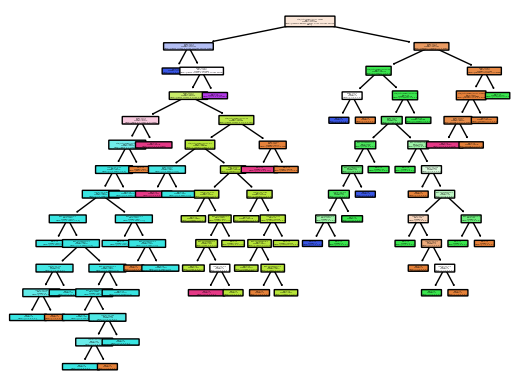

In [37]:
# Visualising the graph without the use of graphvizplt.figure(figsize = (20,20))
from sklearn.tree import plot_tree

dec_tree = plot_tree(decision_tree=model, feature_names = dataset.columns, 
                     class_names =["Production Mode", "Internal Fault", "External Fault", "External Event: Overcast Weather No Peak", "Sunrise Mode", "Sunset Mode", "External Event: Overcast Weather at Peak"] , filled = True , precision = 4, rounded = True)

In [38]:
#Save the results

np.savetxt("C:\\Users\\Ditshego.Ramokolo\\OneDrive - Komatsu Ltd\\Documents\\School Stuff\\ITRPA4-34\\Research_Predictions.txt", y_pred, delimiter=',')

In [39]:
pd.DataFrame(X_train.columns).to_csv("feature_list.csv", index = None)

In [40]:
pd.DataFrame(X_train.dtypes).reset_index().to_csv("data_types.csv", index = None)